In [3]:
# Run this cell but don't modify it.

%load_ext autoreload
%autoreload 2
from matrix import Matrix, zeroes, identity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# some functionality already exists... here's a demo

m1 = Matrix([
    [1, 2],
    [3, 4]
])

m2 = Matrix([
    [2, 5],
    [6, 1]
])

print("m1 is")
print(m1)

print("m2 is")
print(m2)

print("we've also provided you with a function called zeros")
print("here's what happens when you call zeros(4,2)")
print(zeroes(4,2))

print("we've also provided you with a function called identity")
print("here's identity(3)")
print(identity(3))

print("but not everything works yet!")
print("for example, matrix addition...")
print("run the cell below to see what happens when we try...")

m1 is
1  2 
3  4 

m2 is
2  5 
6  1 

we've also provided you with a function called zeros
here's what happens when you call zeros(4,2)
0.0  0.0 
0.0  0.0 
0.0  0.0 
0.0  0.0 

we've also provided you with a function called identity
here's identity(3)
1.0  0.0  0.0 
0.0  1.0  0.0 
0.0  0.0  1.0 

but not everything works yet!
for example, matrix addition...
run the cell below to see what happens when we try...


In [5]:
m1 = Matrix([
    [1, 2],
    [3, 4]
])

m2 = Matrix([
    [2, 5],
    [6, 1]
])

m3 = m1 + m2
print("m1 + m2 is")
print(m3)

m1 + m2 is
None


In [27]:
# Try running this code. You should get an assertion error. 
# You will continue to get assertion errors until all the 
# methods in matrix.py are correctly implemented.

# You can open matrix.py by selecting File > Open... 
import test


Congratulations! All tests pass. Your Matrix class is working as expected.


In [28]:
# open matrix.py (File > Open...) and start
# implementing matrix methods! 

# when your code passes all the tests you can submit by 
# pressing the SUBMIT button in the lower right corner 
# of this page.

In [29]:
%matplotlib inline

import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import datagenerator
import matrix as m

matplotlib.rcParams.update({'font.size': 16})

# data_groundtruth() has the following inputs:
# Generates Data
# Input variables are:
# initial position meters
# initial velocity km/h
# final velocity (should be a negative number) km/h
# acceleration (should be a negative number) m/s^2
# how long the vehicle should idle 
# how long the vehicle should drive in reverse at constant velocity
# time between lidar measurements in milliseconds

time_groundtruth, distance_groundtruth, velocity_groundtruth, acceleration_groundtruth = datagenerator.generate_data(5, 100, -10, -10,
                                                                                              5000, 5000, 50)
data_groundtruth = pd.DataFrame(
    {'time': time_groundtruth,
     'distance': distance_groundtruth,
     'velocity': velocity_groundtruth,
     'acceleration': acceleration_groundtruth
    })

data_groundtruth.head()

,time,distance,velocity,acceleration
0,0,5.000000,100.0,-129600.0
1,50,6.376389,98.2,-129600.0
2,100,7.727778,96.4,-129600.0
3,150,9.054167,94.6,-129600.0
4,200,10.355556,92.8,-129600.0


[Text(0,0.5,'distance (meters)'), Text(0.5,0,'time (milliseconds)')]

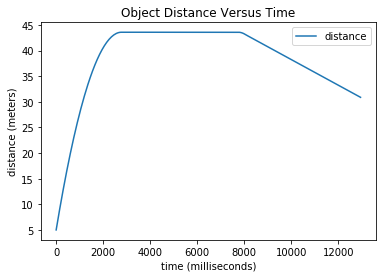

In [30]:
ax1 = data_groundtruth.plot(kind='line', x='time', y='distance', title='Object Distance Versus Time')
ax1.set(xlabel='time (milliseconds)', ylabel='distance (meters)')

In [31]:
data_groundtruth['acceleration'] = data_groundtruth['acceleration'] * 1000 / math.pow(60 * 60, 2)
data_groundtruth.head()

,time,distance,velocity,acceleration
0,0,5.000000,100.0,-10.0
1,50,6.376389,98.2,-10.0
2,100,7.727778,96.4,-10.0
3,150,9.054167,94.6,-10.0
4,200,10.355556,92.8,-10.0


In [60]:
# make lidar measurements
lidar_standard_deviation = 0.15
lidar_measurements = datagenerator.generate_lidar(distance_groundtruth, lidar_standard_deviation)
lidar_time = time_groundtruth
data_lidar = pd.DataFrame(
    {'time': time_groundtruth,
     'distance': distance_groundtruth,
     'lidar': lidar_measurements
    })
data_lidar.tail()

,time,distance,lidar
255,12750,31.377778,31.679157
256,12800,31.252778,31.462726
257,12850,31.127778,31.057684
258,12900,31.002778,30.863112
259,12950,30.877778,31.002841


In [47]:
# Kalman Filter Initialization

initial_distance = 0
initial_velocity = 0

x_initial = m.Matrix([[initial_distance], [initial_velocity * 1e-3 / (60 * 60)]])
P_initial = m.Matrix([[5, 0],[0, 5]])
acceleration_variance = 50
lidar_variance = math.pow(lidar_standard_deviation, 2)
lidar_variance

H = m.Matrix([[1, 0]])
R = m.Matrix([[lidar_variance]])
I = m.identity(2)

def F_matrix(delta_t):
    return m.Matrix([[1, delta_t], [0, 1]])

def Q_matrix(delta_t, variance):
    t4 = math.pow(delta_t, 4)
    t3 = math.pow(delta_t, 3)
    t2 = math.pow(delta_t, 2)
    
    return variance * m.Matrix([[(1/4)*t4, (1/2)*t3], [(1/2)*t3, t2]])
Q_matrix

<function __main__.Q_matrix(delta_t, variance)>

In [59]:
# Kalman Filter Implementation

x = x_initial
P = P_initial

x_result = []
time_result = []
v_result = []


for i in range(len(lidar_measurements) - 1):
        
    # calculate time that has passed between lidar measurements
    delta_t = (lidar_time[i + 1] - lidar_time[i]) / 1000.0
    z = m.Matrix([[lidar_measurements[i + 1]]])


yyy = len(lidar_measurements)
yyy

260

In [66]:
# Kalman Filter Implementation

x = x_initial
P = P_initial

x_result = []
time_result = []
v_result = []
v_result1 = []

for i in range(len(lidar_measurements) - 1):
        
    # calculate time that has passed between lidar measurements
    delta_t = (lidar_time[i + 1] - lidar_time[i]) / 1000.0

    # Prediction Step - estimates how far the object traveled during the time interval
    F = F_matrix(delta_t)
    Q = Q_matrix(delta_t, acceleration_variance)
    
    x_prime = F * x
    P_prime = F * P * F.T() + Q
    
    # Measurement Update Step - updates belief based on lidar measurement
    y = m.Matrix([[lidar_measurements[i + 1]]]) - H * x_prime
    S = H * P_prime * H.T() + R
    K = P_prime * H.T() * S.inverse()
    x = x_prime + K * y
    P = (I - K * H) * P_prime

    # Store distance and velocity belief and current time
    x_result.append(x[0][0])
    v_result.append(3600.0/1000 * x[1][0])
    v_result1.append(x[1][0])
    time_result.append(lidar_time[i+1])
    
result = pd.DataFrame(
    {'time': time_result,
     'distance': x_result,
     'velocity': v_result,
     'velocity1': v_result1
    })

result.tail()

,time,distance,velocity,velocity1
254,12750,31.375343,-9.692974,-2.692493
255,12800,31.325942,-8.214315,-2.281754
256,12850,31.152672,-9.241147,-2.566985
257,12900,30.962438,-10.314876,-2.865243
258,12950,30.889680,-9.091594,-2.525443
